In [1]:
# import library
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Download mobileNet from tensorflow hub
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4" 
model = hub.load(model_url)
print("Model loaded successfully!")

Model loaded successfully!


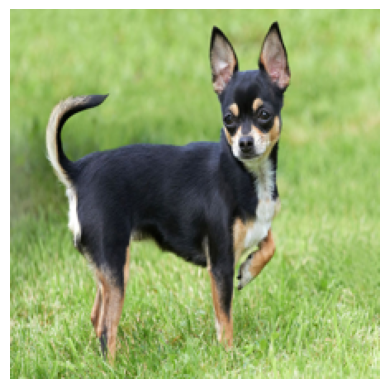

In [3]:
# Download image and show the image
image_path = "https://cdn.britannica.com/44/233244-050-A65D4571/Chihuahua-dog.jpg"
image = Image.open(tf.keras.utils.get_file("chihoahoa.jpg", image_path)).resize((224, 224)) 
plt.imshow(image) 
plt.axis('off') 
plt.show()

In [4]:
# Pretrain image
def preprocess_image(image): 
    image = np.array(image).astype(np.float32) / 255.0
    return image[np.newaxis, ...] 
processed_image = preprocess_image(image) 
print("Image preprocessed successfully!")

Image preprocessed successfully!


In [5]:
# Prediction
predictions = model(processed_image) 
predicted_class = np.argmax(predictions, axis=-1) 
print("Predicted class index:", predicted_class)

Predicted class index: [152]


In [6]:
labels_path = "https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt" 
labels = tf.keras.utils.get_file("ImageNetLabels.txt", labels_path) 
with open(labels, "r") as f: 
    labels = f.read().splitlines() 
print("Predicted label:", labels[predicted_class[0]])

Predicted label: Chihuahua


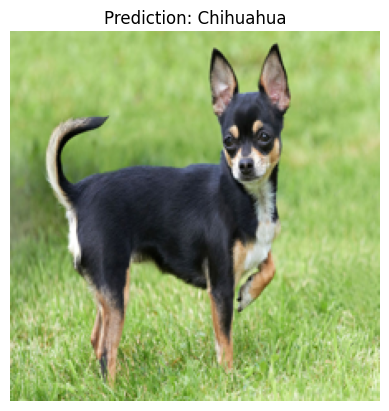

In [7]:
plt.imshow(image) 
plt.title(f"Prediction: {labels[predicted_class[0]]}") 
plt.axis('off') 
plt.show()